# Analysis of workshop follow-up survey results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Load dataset

In [2]:
#df = pd.read_excel("workshop-followup-survey-report.xlsx")
df = pd.read_csv("workshop-followup-survey-report_2.csv")
# replace space by underscore, DONT NEED TO
#df.columns = [c.replace(' ', '_') for c in df.columns]

# remove the GitHub-Pages question since it's probably misunderstood
#del df["GitHub/GitLab/BitBucket_Pages"]
del df["GitHub/GitLab/BitBucket Pages"]
df.head()

,Which workshop did you attend?,What is your current position?,Other,Version control,Automated testing,Travis CI,Code coverage analysis,Jupyter Notebooks,CMake,Integrated development environments,Code review,Read the docs,Reusable,Reproducible,Modular,Documented,Has it become easier for you to collaborate on software development with your colleagues and collaborators?,Have you introduced one or more of your colleagues to new tools or practices as a result of the workshop?
0,"Espoo, Finland, December 2016",Graduate student,NaN,I'm using this tool better than before,I started using this tool,I don't use this tool,I don't use this tool,I started using this tool,I started using this tool,I don't use this tool,I started using this tool,I'm using this tool better than before,1.0,1.0,1.0,1.0,1.0,1.0
1,"Stockholm, Sweden, February 2017",NaN,Staff Scientist,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,1.0,1.0,0.0,1.0,NaN,1.0
2,"Stockholm, Sweden, February 2017",Postdoc,NaN,I'm using this tool in the same way as before,I don't use this tool,I don't use this tool,I don't use this tool,I started using this tool,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I'm using this tool in the same way as before,1.0,1.0,0.0,0.0,0.0,1.0
3,"Stockholm, Sweden, February 2017",Postdoc,NaN,I'm using this tool in the same way as before,I'm using this tool better than before,I'm using this tool better than before,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I'm using this tool in the same way as before,I'm using this tool in the same way as before,I'm using this tool in the same way as before,1.0,1.0,1.0,1.0,1.0,1.0
4,"Espoo, Finland, December 2016",Researcher,NaN,I'm using this tool better than before,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I don't use this tool,1.0,1.0,0.0,1.0,1.0,1.0


In [3]:
#df.insert(0,"number")
df = df.reset_index()
df.head()

,index,Which workshop did you attend?,What is your current position?,Other,Version control,Automated testing,Travis CI,Code coverage analysis,Jupyter Notebooks,CMake,Integrated development environments,Code review,Read the docs,Reusable,Reproducible,Modular,Documented,Has it become easier for you to collaborate on software development with your colleagues and collaborators?,Have you introduced one or more of your colleagues to new tools or practices as a result of the workshop?
0,0,"Espoo, Finland, December 2016",Graduate student,NaN,I'm using this tool better than before,I started using this tool,I don't use this tool,I don't use this tool,I started using this tool,I started using this tool,I don't use this tool,I started using this tool,I'm using this tool better than before,1.0,1.0,1.0,1.0,1.0,1.0
1,1,"Stockholm, Sweden, February 2017",NaN,Staff Scientist,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,1.0,1.0,0.0,1.0,NaN,1.0
2,2,"Stockholm, Sweden, February 2017",Postdoc,NaN,I'm using this tool in the same way as before,I don't use this tool,I don't use this tool,I don't use this tool,I started using this tool,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I'm using this tool in the same way as before,1.0,1.0,0.0,0.0,0.0,1.0
3,3,"Stockholm, Sweden, February 2017",Postdoc,NaN,I'm using this tool in the same way as before,I'm using this tool better than before,I'm using this tool better than before,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I'm using this tool in the same way as before,I'm using this tool in the same way as before,I'm using this tool in the same way as before,1.0,1.0,1.0,1.0,1.0,1.0
4,4,"Espoo, Finland, December 2016",Researcher,NaN,I'm using this tool better than before,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I don't use this tool,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
df.mean()

index                                                                                                          15.500000
Reusable                                                                                                        0.846154
Reproducible                                                                                                    0.833333
Modular                                                                                                         0.600000
Documented                                                                                                      0.640000
Has it become easier for you to collaborate on software development with your colleagues and collaborators?     0.777778
Have you introduced one or more of your colleagues to new tools or practices as a result of the workshop?       0.615385
dtype: float64

In [5]:
first_index = df.columns.get_loc("Version control")
last_index = df.columns.get_loc("Read the docs")
tmp = df.columns[first_index:last_index+1].tolist()
lessons = [x.encode('utf-8') for x in tmp]
lessons

['Version control',
 'Automated testing',
 'Travis CI',
 'Code coverage analysis',
 'Jupyter Notebooks',
 'CMake',
 'Integrated development environments',
 'Code review',
 'Read the docs']

In [6]:
df2 = df[lessons]
df2.head()

,Version control,Automated testing,Travis CI,Code coverage analysis,Jupyter Notebooks,CMake,Integrated development environments,Code review,Read the docs
0,I'm using this tool better than before,I started using this tool,I don't use this tool,I don't use this tool,I started using this tool,I started using this tool,I don't use this tool,I started using this tool,I'm using this tool better than before
1,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool
2,I'm using this tool in the same way as before,I don't use this tool,I don't use this tool,I don't use this tool,I started using this tool,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I'm using this tool in the same way as before
3,I'm using this tool in the same way as before,I'm using this tool better than before,I'm using this tool better than before,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I'm using this tool in the same way as before,I'm using this tool in the same way as before,I'm using this tool in the same way as before
4,I'm using this tool better than before,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I don't use this tool,I'm using this tool in the same way as before,I don't use this tool,I don't use this tool


In [7]:
answers = pd.melt(df2,id_vars="index",value_vars=lessons,value_name="answer",var_name="lesson")
answers["index"]=1
answers=answers.rename(columns = {'index':'number'})
answers.head()

,number,lesson,answer
0,1,Version control,I'm using this tool better than before
1,1,Version control,I don't use this tool
2,1,Version control,I'm using this tool in the same way as before
3,1,Version control,I'm using this tool in the same way as before
4,1,Version control,I'm using this tool better than before


In [8]:
table = answers.pivot_table(values="number",index="answer", columns="lesson",aggfunc=np.sum)
table

lesson,Automated testing,CMake,Code coverage analysis,Code review,Integrated development environments,Jupyter Notebooks,Read the docs,Travis CI,Version control
answer,,,,,,,,,
I'm using this tool in the same way as before,3.0,5.0,5.0,1.0,7.0,3.0,4.0,1.0,4.0
I don't use this tool,14.0,13.0,16.0,16.0,10.0,10.0,14.0,23.0,3.0
I started using this tool,8.0,5.0,5.0,6.0,3.0,8.0,6.0,1.0,2.0
I'm using this tool better than before,1.0,3.0,NaN,3.0,6.0,5.0,2.0,1.0,17.0


Text(0.5,140.667,u'')

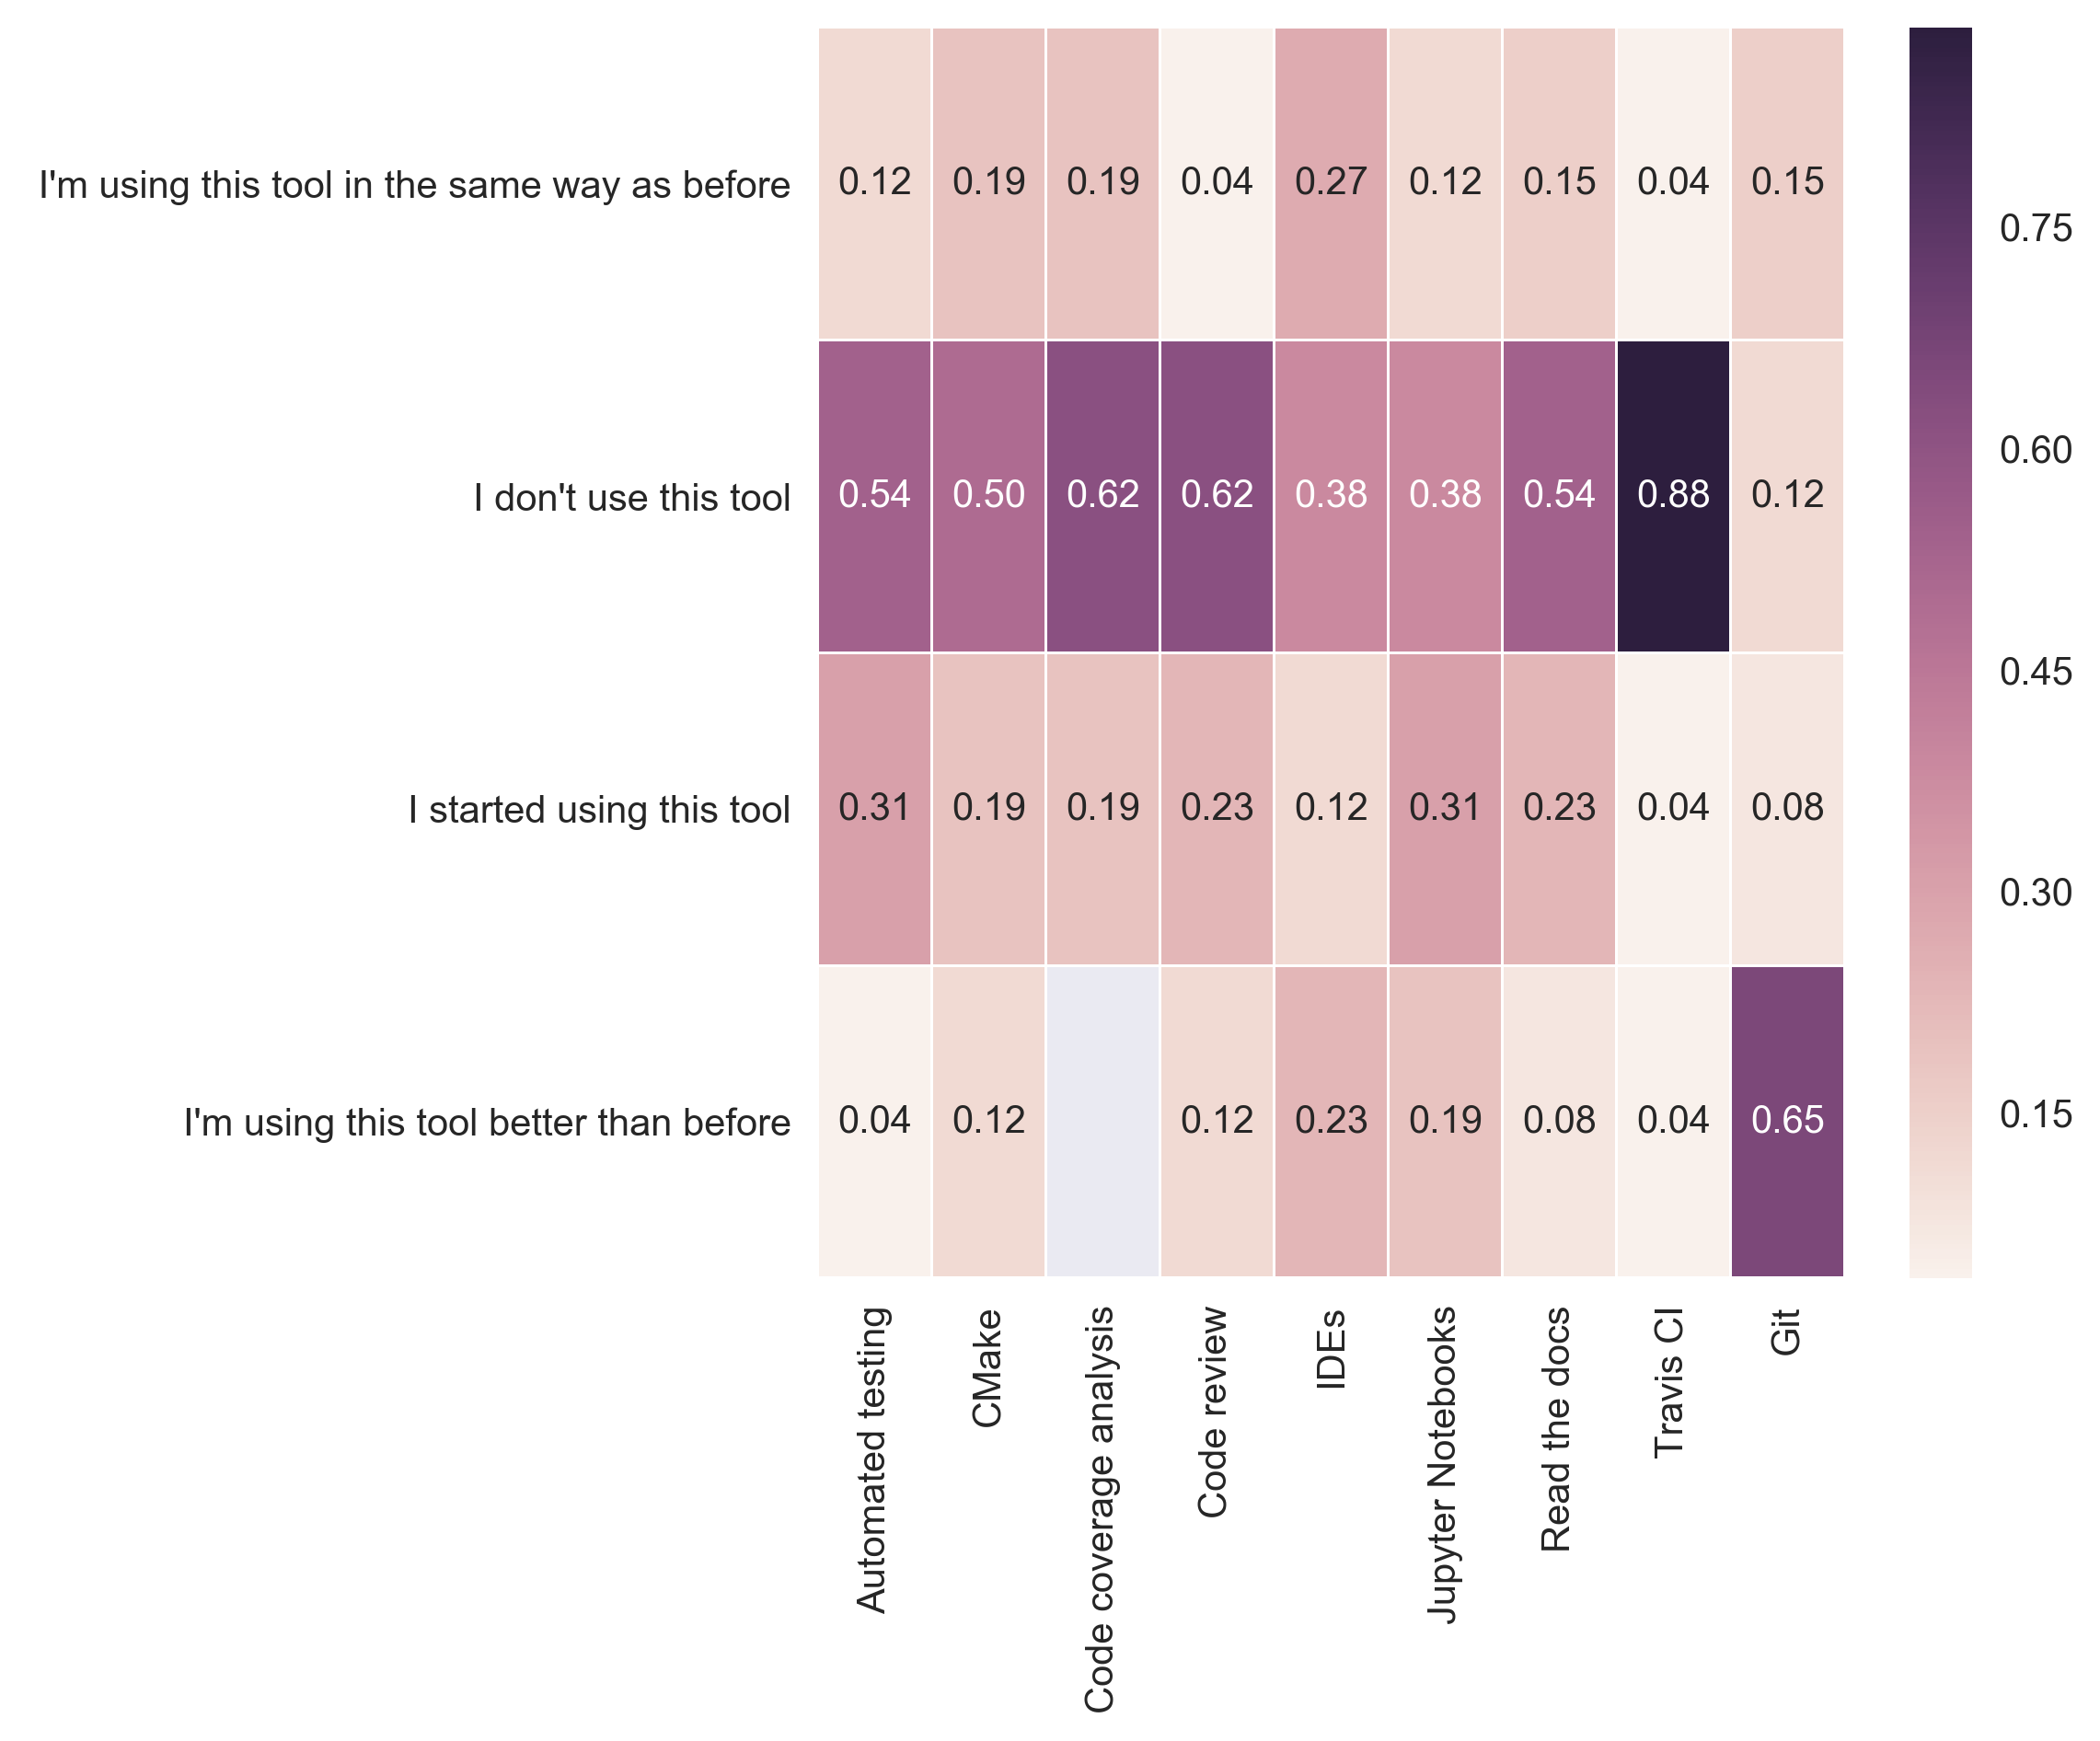

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (6,6), dpi=300)

# normalize
table_norm=(table)/table.sum()

# rename a bit for appearance
table_norm=table_norm.rename(columns = {'Version control':'Git'})
table_norm=table_norm.rename(columns = {'Integrated development environments':'IDEs'})
sns.heatmap(table_norm,linewidths=.5, annot=True, fmt=".2f");
sns.set(font_scale=3)
ax.set_ylabel('')    
ax.set_xlabel('')

In [10]:
#sns.factorplot(x="answer",col="lesson",data=answers,kind="count")

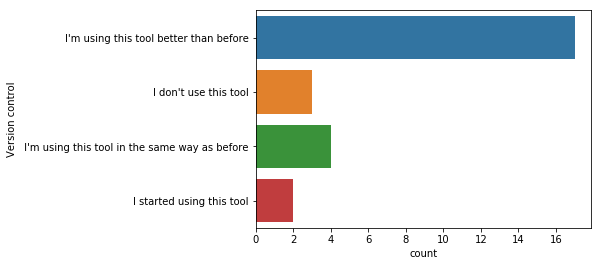

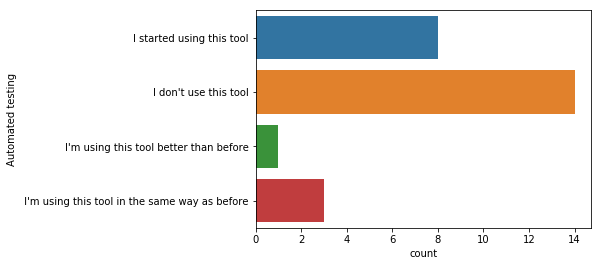

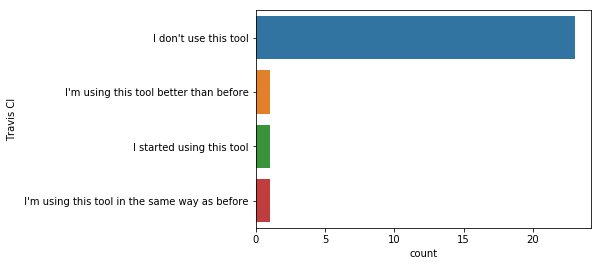

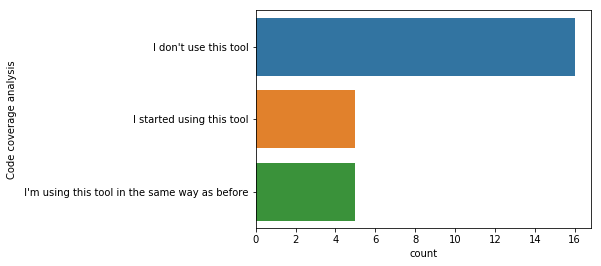

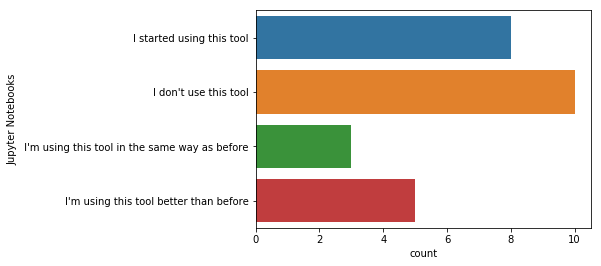

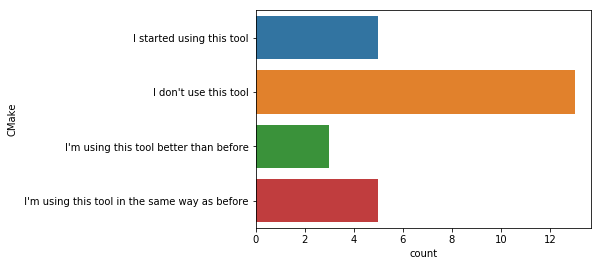

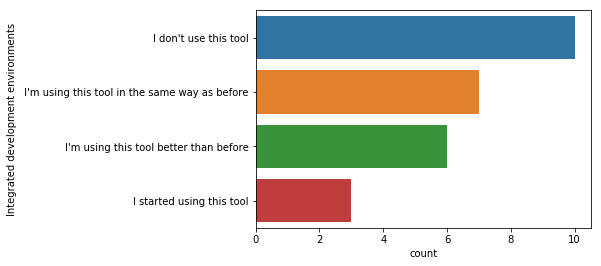

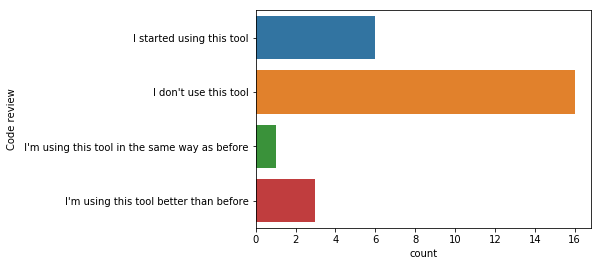

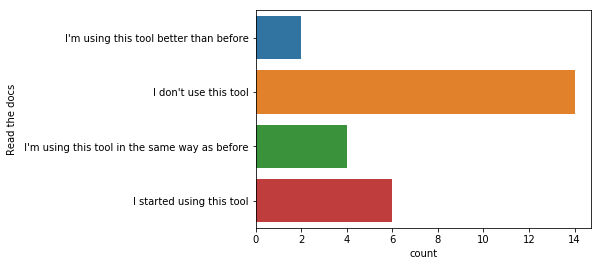

In [11]:
sns.reset_orig()
for i in lessons:
    plt.figure()
    sns.countplot(y=i,data=df)